In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
params = []
losses_list = []
for solver_name in ['adam', 'rmsprop', 'sgd', 'sgd_momentum']:
    for lr in [1e-5, 3e-5, 1e-4, 3e-4, 1e-3]:
        for decay in [1e-6, 1e-5, 1e-4]:
            save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(solver_name, lr, decay)
            val_loss = np.loadtxt(os.path.join(save_dir, 'val_losses.txt'))
            params.append({
                'solver': solver_name,
                'lr': lr,
                'decay': decay
            })
            losses_list.append(val_loss)

OSError: /home/kmouraviev/FCRN_notebooks/finetune_sgd_momentum_lr0.001_decay1e-06/val_losses.txt not found.

In [16]:
max_losses = [x.max() for x in losses_list]

In [17]:
best_results = np.argsort(max_losses)[:5]

In [18]:
from keras.models import load_model
import h5py

In [19]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [20]:
dataset = h5py.File('/home/kmouraviev/NYU_dataset_hdf5/data.hdf5', 'r')
rgbs = dataset['data']
depths = dataset['label']

In [21]:
rgbs_val = rgbs[50000::1000]
depths_val = depths[50000::1000]

In [22]:
def unpreprocess(image):
    img_min = -123
    img_max = 151
    return (image - img_min) / (img_max - img_min)

In [36]:
print(params[best_results[4]])

{'solver': 'sgd_momentum', 'lr': 0.0003, 'decay': 1e-05}


In [33]:
best_results

array([32, 31, 30,  2, 55])

In [24]:
losses_list[-2]

array([0.4331073 , 0.51721336, 0.4111143 , 0.39082559, 0.38884212,
       0.37534772, 0.35984723, 0.32811183, 0.33059756, 0.33791507,
       0.33825763, 0.33280852, 0.33128925, 0.33617706, 0.3250677 ,
       0.32685626, 0.32947476, 0.33494526, 0.32536937, 0.32891206])

### SGD solver, lr=1e-5, decay=1e-4

In [26]:
import tensorflow as tf

MSE: 0.5319533267924113


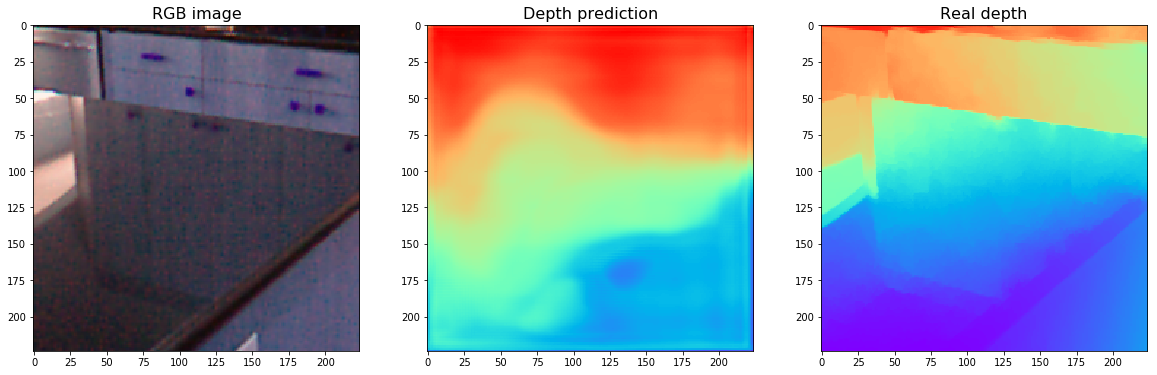

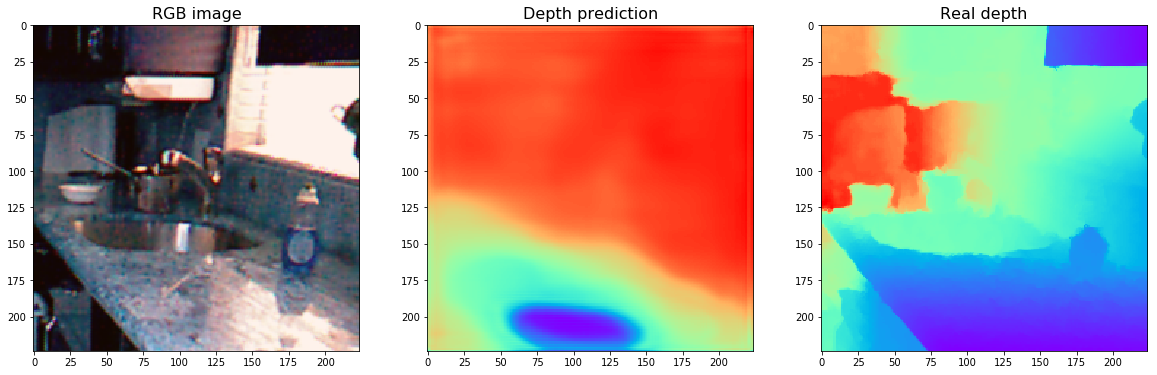

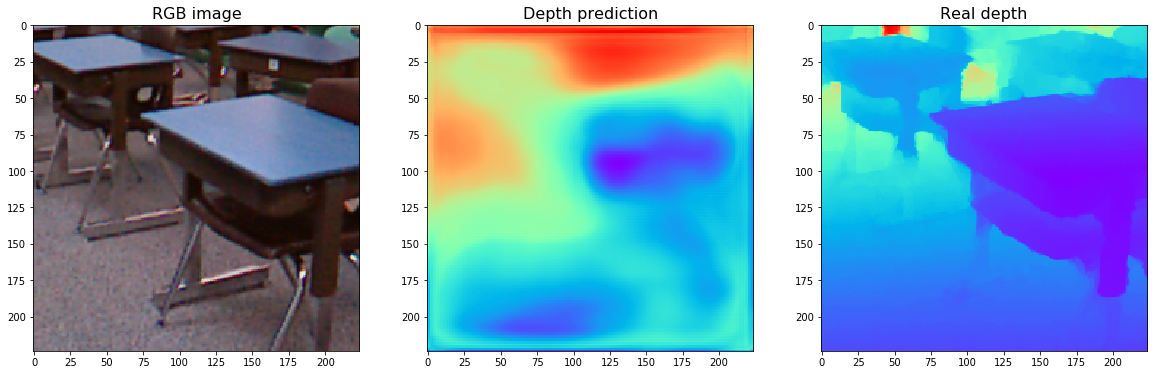

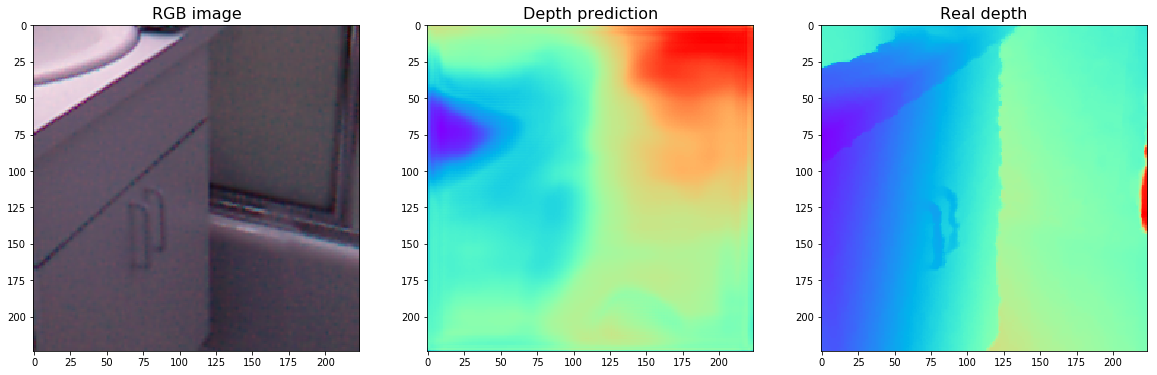

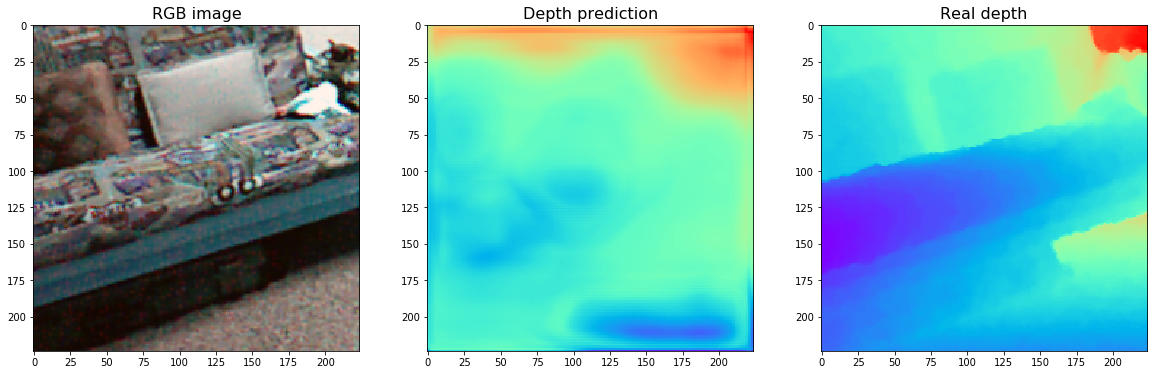

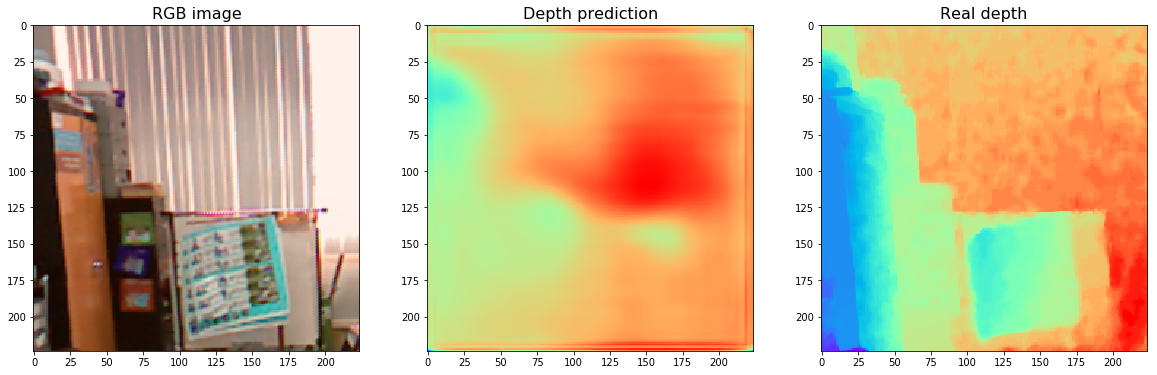

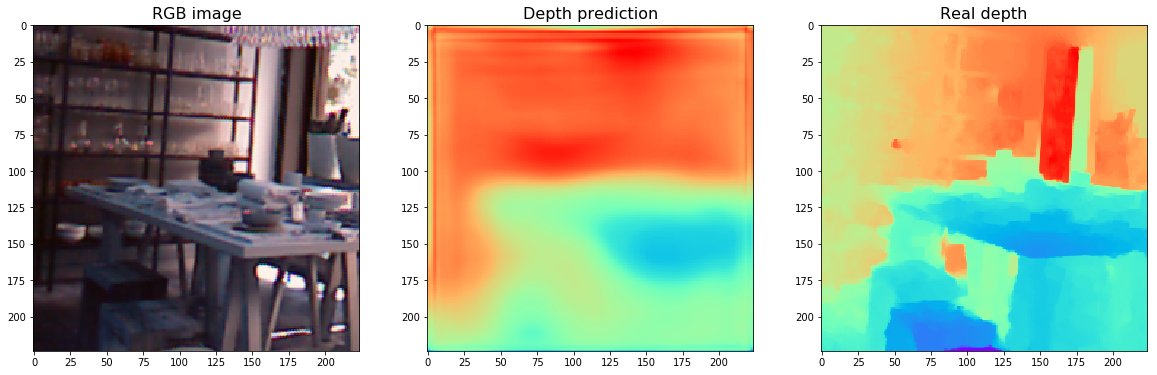

In [27]:
result_id = 0
best_epoch = losses_list[result_id].argmax()
param = params[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(
    param['solver'], 
    param['lr'],
    param['decay']
)
with tf.device('/cpu:0'):
    model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
    depth_prediction = model.predict(rgbs_val)
    print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')

### SGD solver, lr=1e-5, decay=1e-5

MSE: 0.4059061275881179


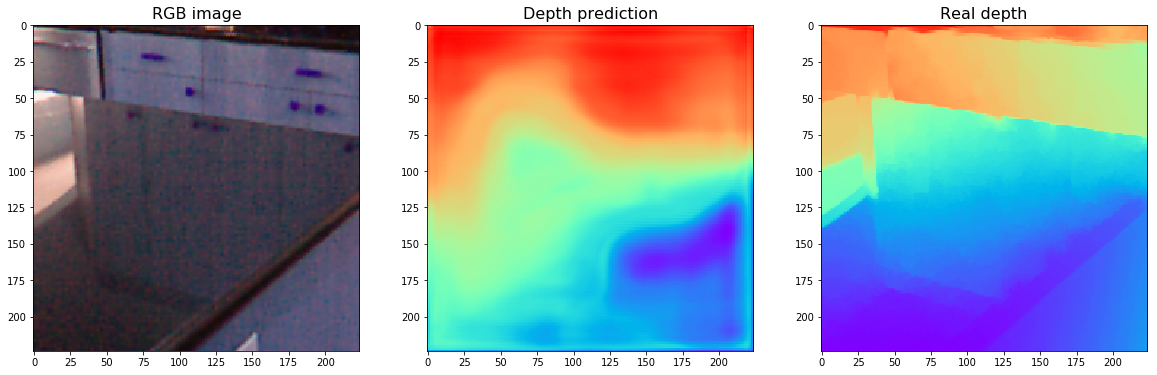

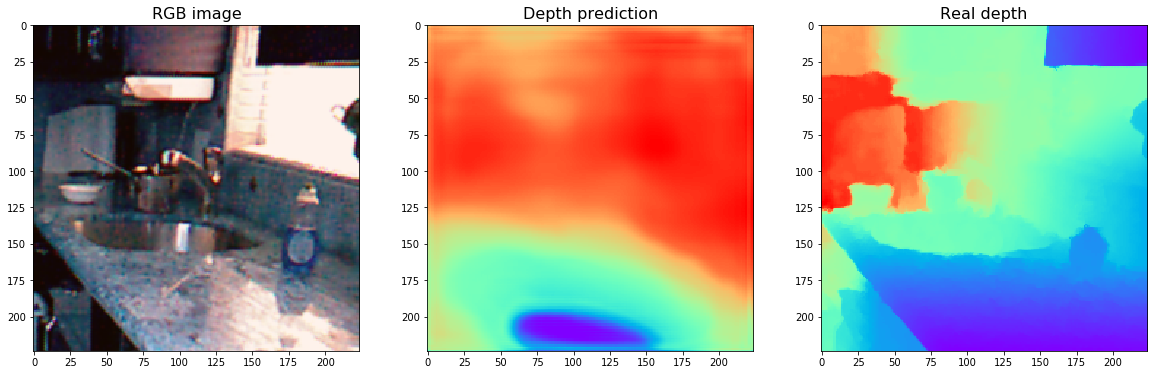

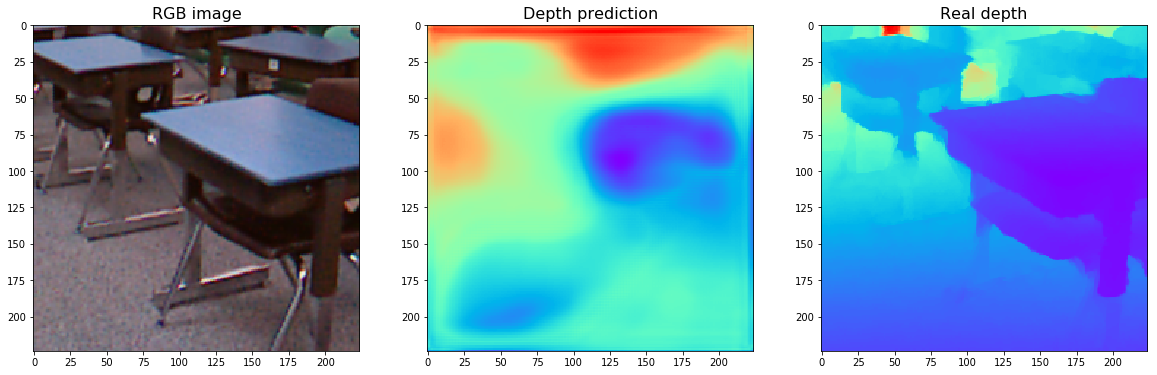

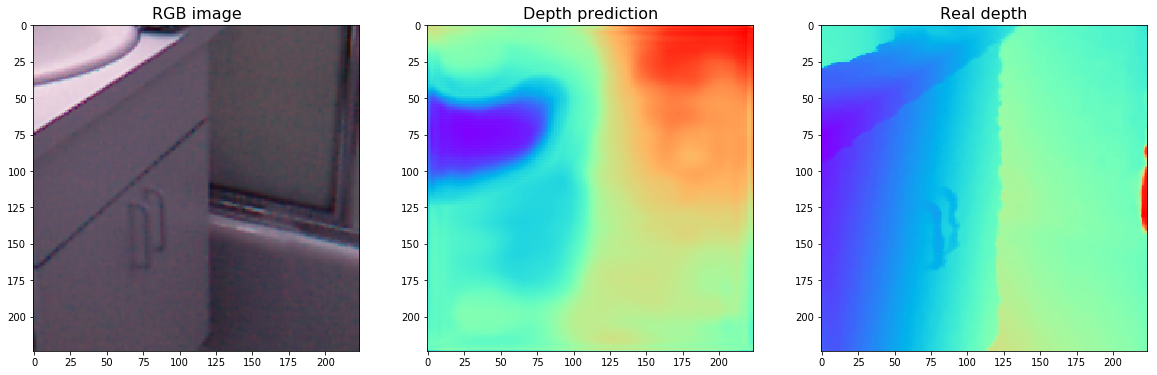

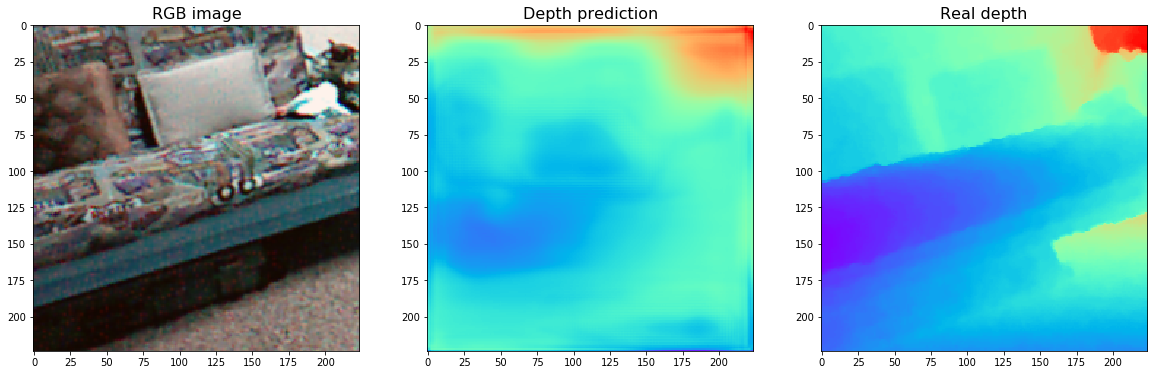

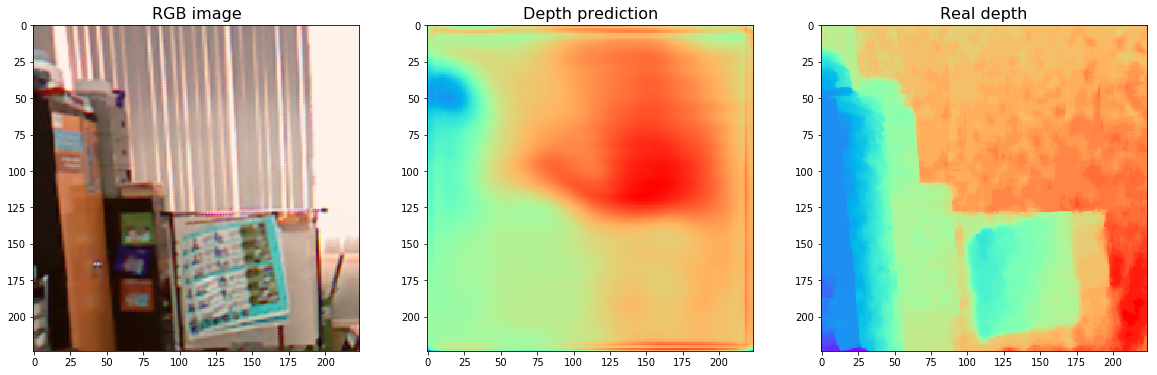

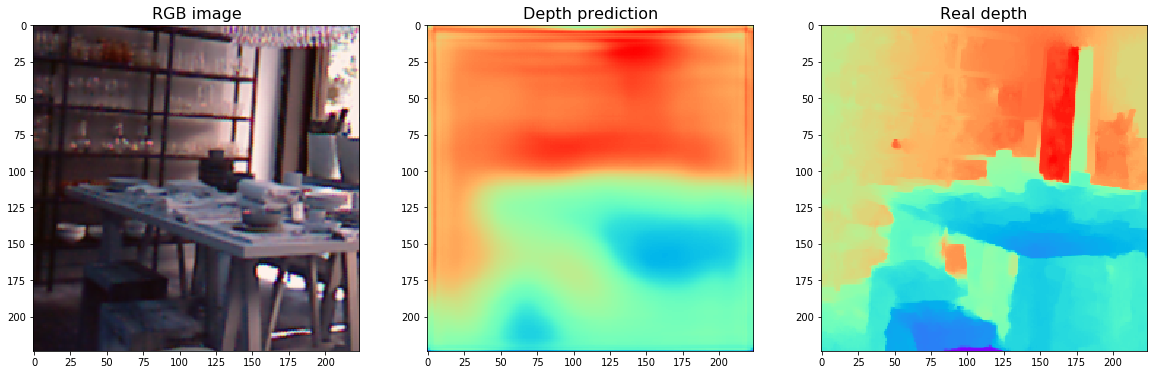

In [28]:
result_id = 1
best_epoch = losses_list[result_id].argmax()
param = params[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(
    param['solver'], 
    param['lr'],
    param['decay']
)
with tf.device('/cpu:0'):
    model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
    depth_prediction = model.predict(rgbs_val)
    print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')

### SGD solver, lr=1e-5, decay=1e-6

MSE: 0.449430119701164


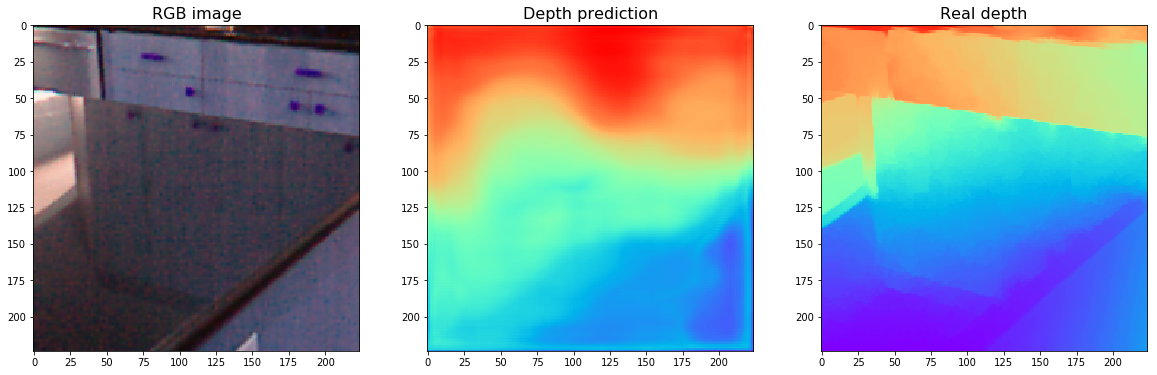

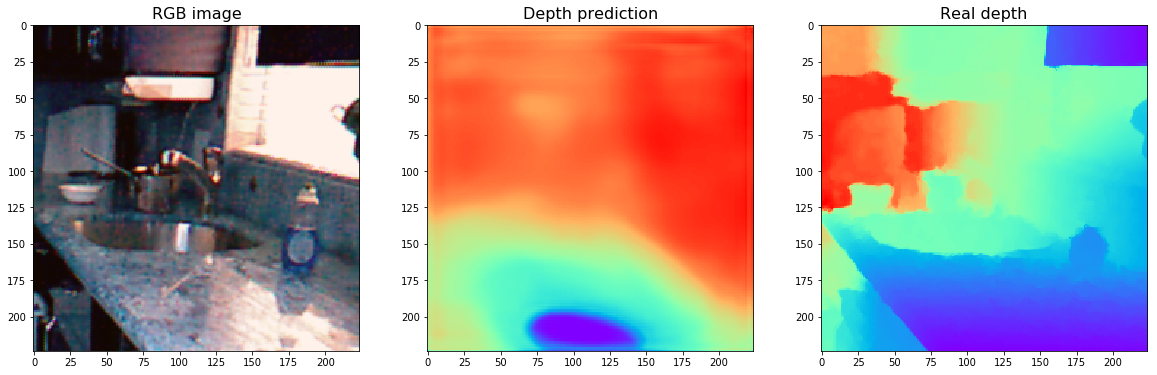

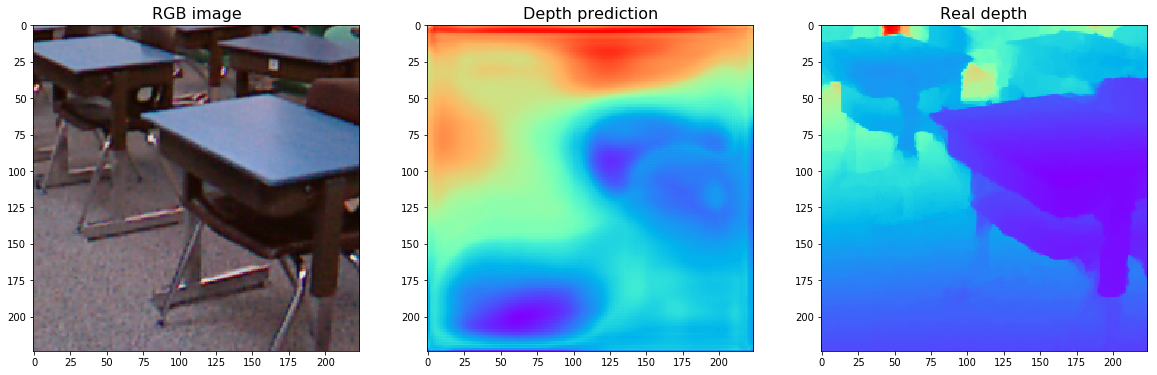

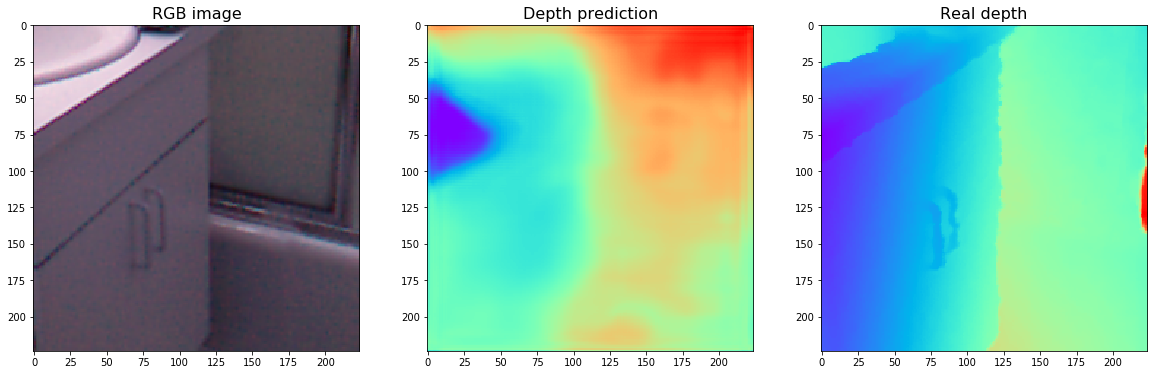

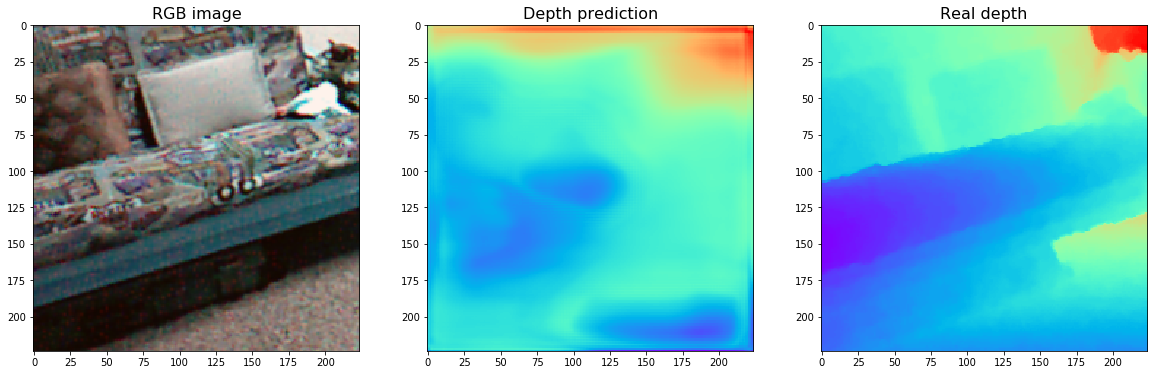

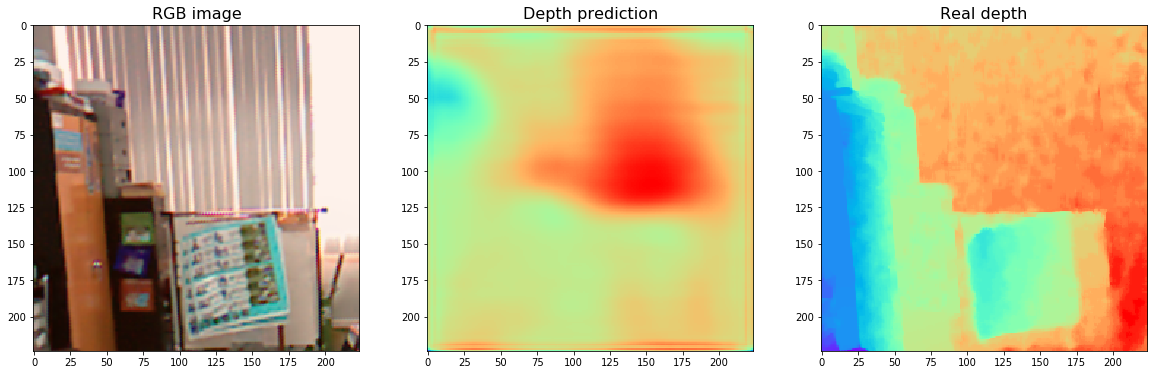

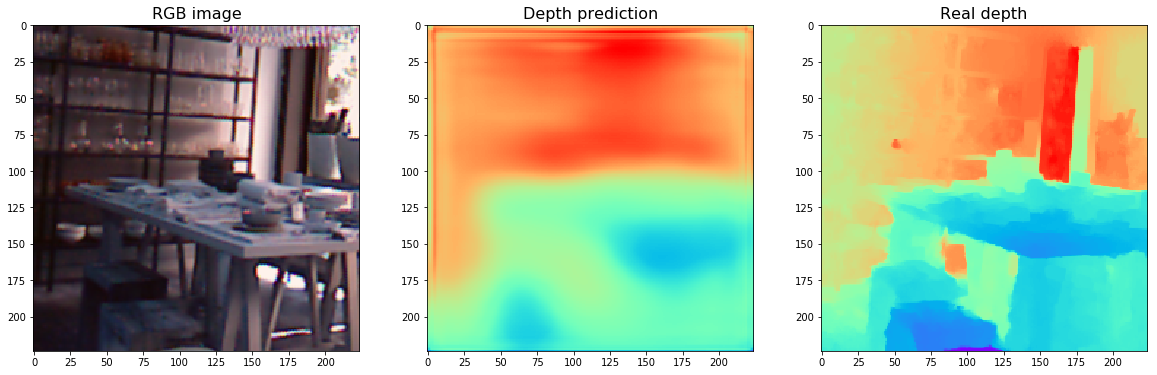

In [29]:
result_id = 2
best_epoch = losses_list[result_id].argmax()
param = params[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(
    param['solver'], 
    param['lr'],
    param['decay']
)
with tf.device('/cpu:0'):
    model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
    depth_prediction = model.predict(rgbs_val)
    print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')

### Adam solver, lr=1e-5, decay=1e-4

MSE: 0.4330169014850778


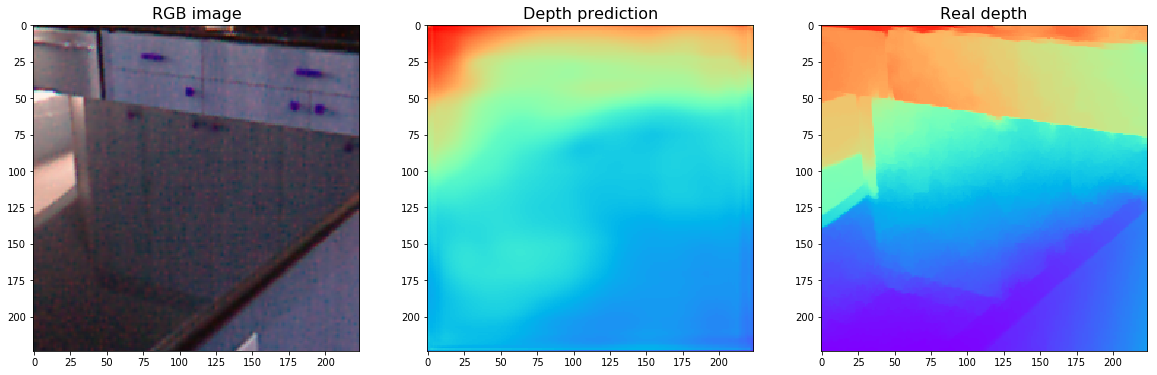

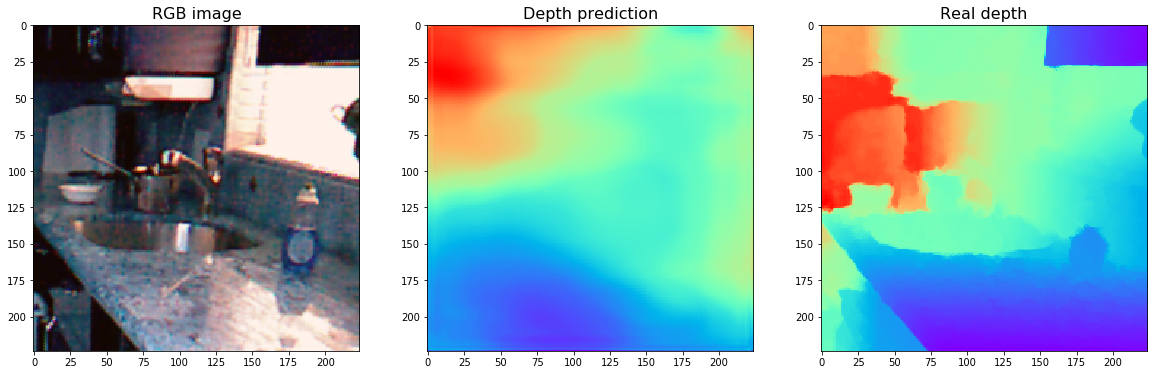

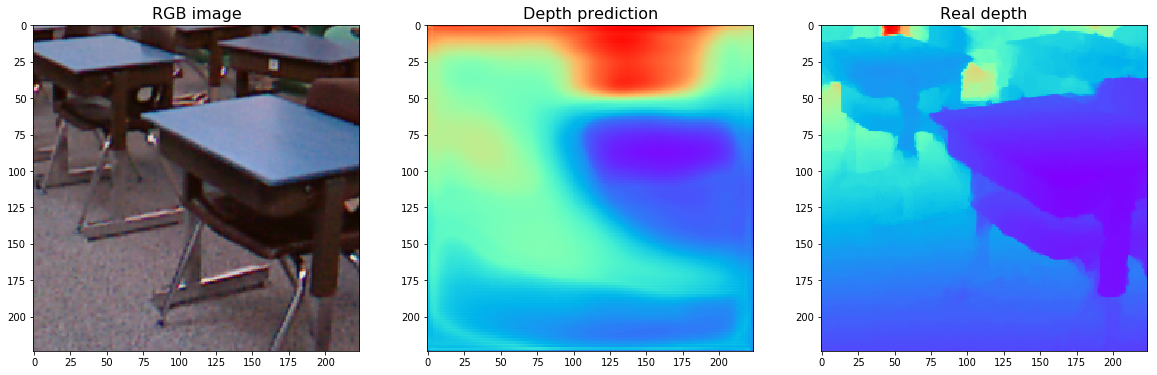

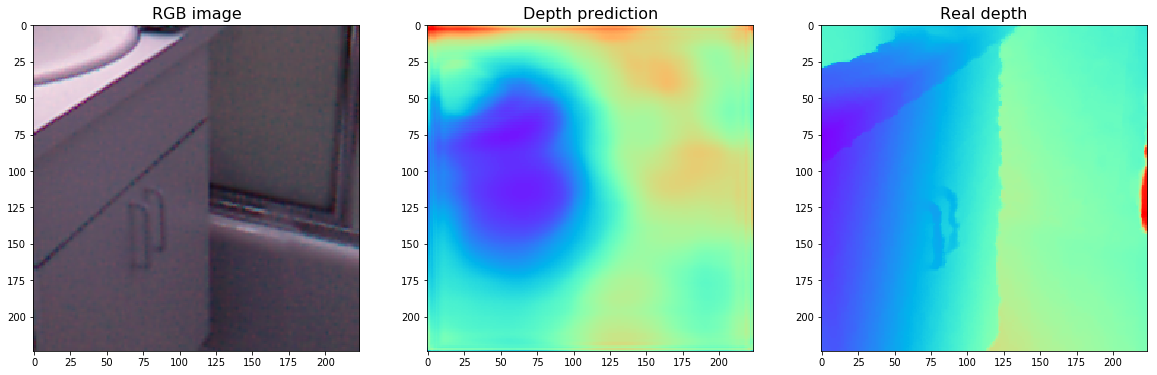

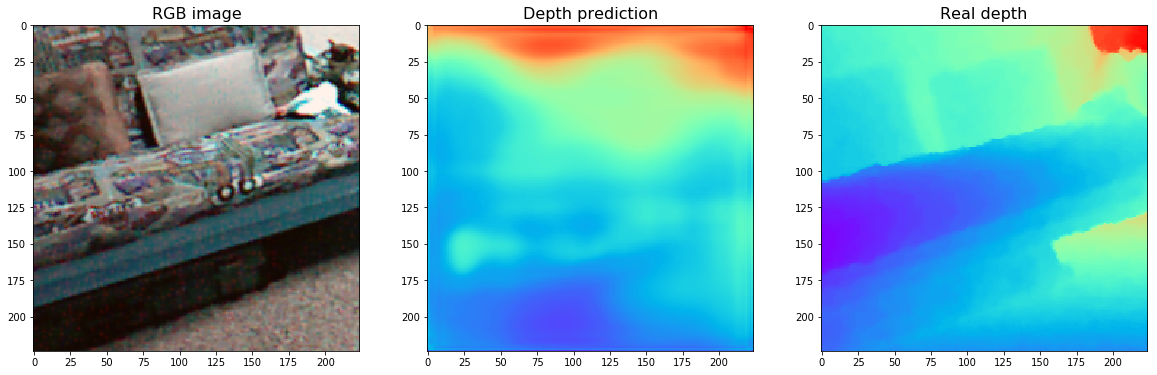

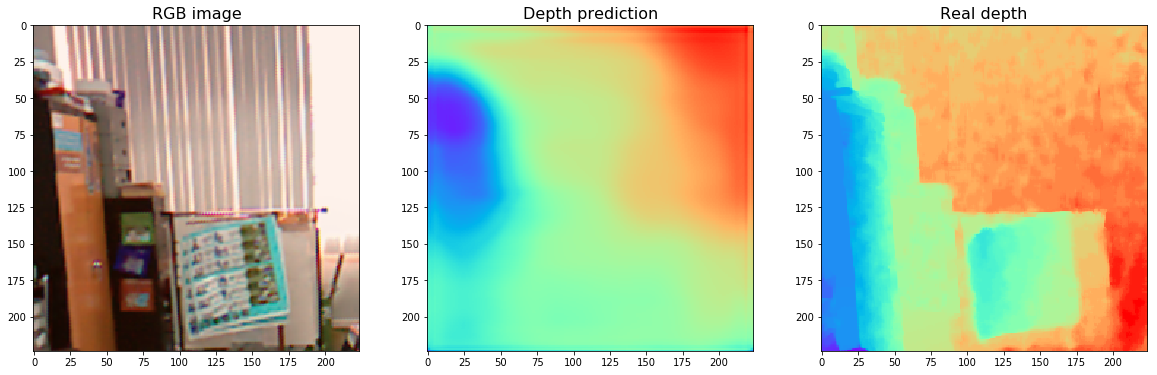

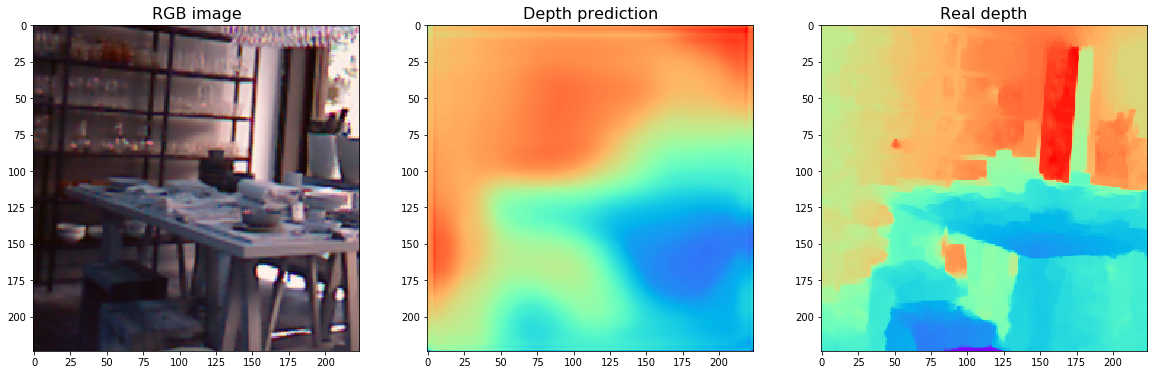

In [30]:
result_id = 3
best_epoch = losses_list[result_id].argmax()
param = params[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(
    param['solver'], 
    param['lr'],
    param['decay']
)
with tf.device('/cpu:0'):
    model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
    depth_prediction = model.predict(rgbs_val)
    print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')

### SGD solver with momentum, lr =1e-5, decay=1e-6

MSE: 0.7094742965623746


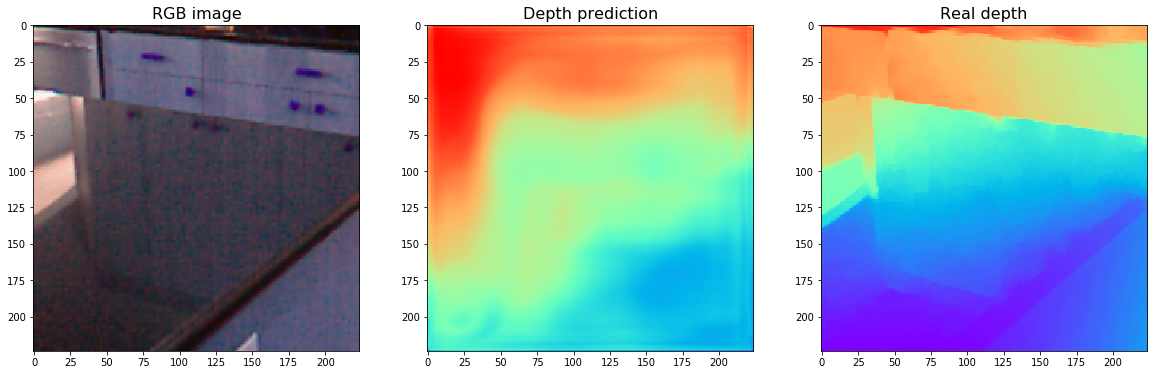

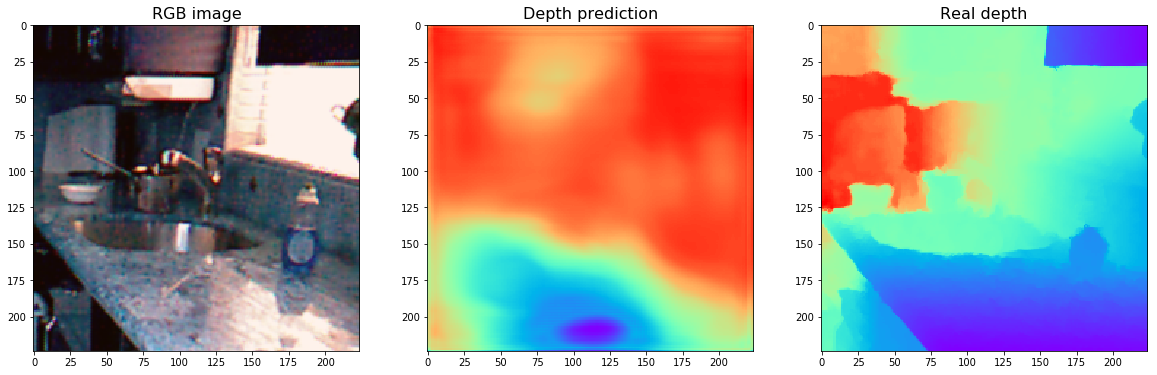

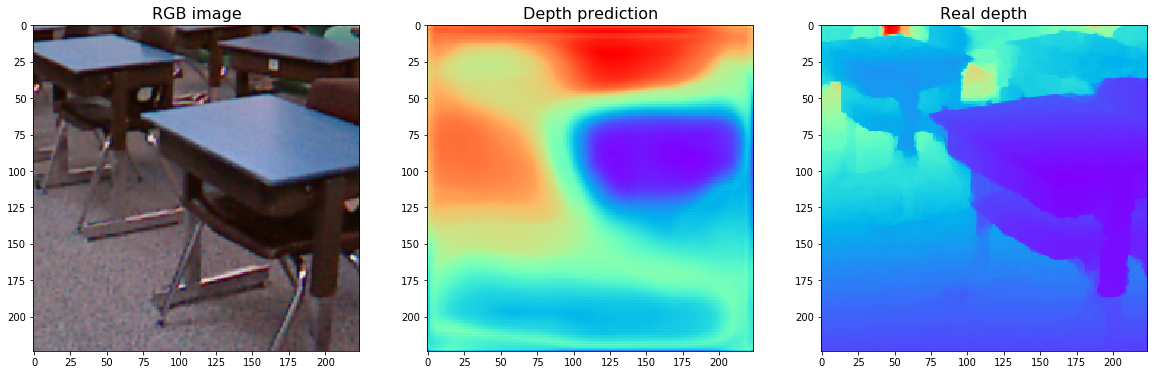

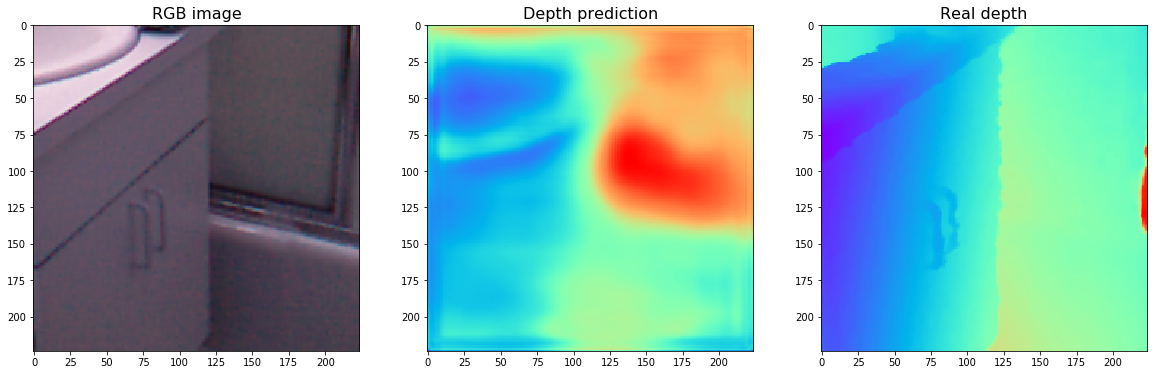

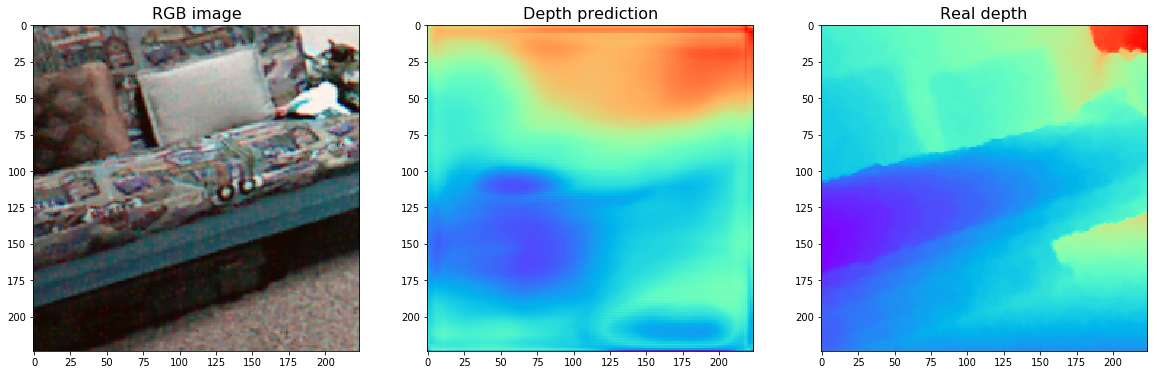

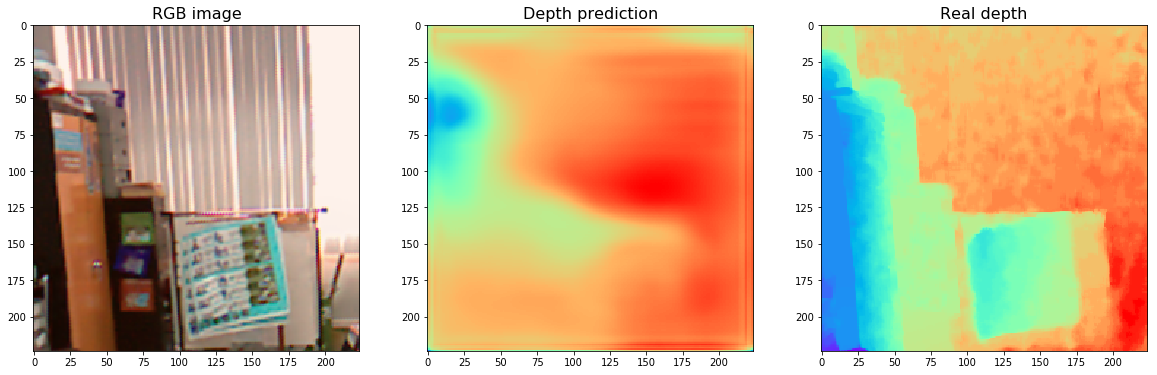

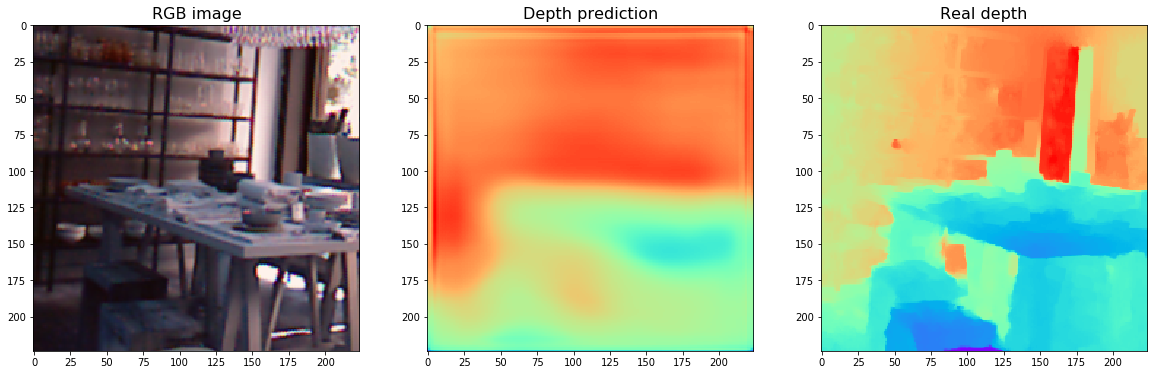

In [31]:
result_id = 4
best_epoch = losses_list[result_id].argmax()
param = params[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(
    param['solver'], 
    param['lr'],
    param['decay']
)
with tf.device('/cpu:0'):
    model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
    depth_prediction = model.predict(rgbs_val)
    print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')